importing librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing data

In [2]:
path = '.\\data.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Separation of data

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

Drawing training data

Text(0, 0.5, 'Exam 2 Score')

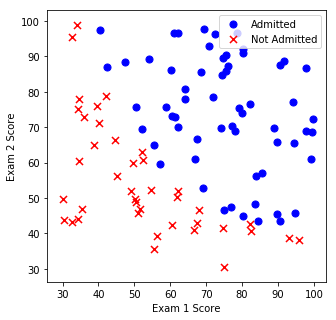

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

Sigmoid function

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Cost function

In [6]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

Gradient descent function

In [7]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

add a ones column - this makes the matrix multiplication work out easier

In [8]:
data.insert(0, 'Ones', 1)

set X (training data) and y (target variable)

In [9]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

convert to numpy arrays and initalize the parameter array theta

In [10]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

Predict function

In [12]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

calculate cost and accuracy

In [13]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

costafteroptimize = cost(result[0], X, y)
print('cost after optimize = ' , costafteroptimize)

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

cost after optimize =  0.20349770158947425
accuracy = 89%
